# APP RATING PREDICTION PROJECT.

# 1 Load the data file using pandas.

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("googleplaystore.csv")

In [12]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2 Check for null values in the data. Get the number of null values for each column.

In [13]:
df.isna().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Rating, Type, Content Rating, Current Var, Android Var have null value.

# 3 Drop records with nulls in any of the columns. 

In [14]:
print("frame size before :", df.shape)
df.dropna(subset=['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver'], axis=0, inplace=True)
print("frame size after :", df.shape)
df.isna().sum(axis=0)

frame size before : (10841, 13)
frame size after : (9360, 13)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4 Variables seem to have incorrect type and inconsistent formatting. You need to fix them.

4.1 Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric

4.2 Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

In [15]:
j=df.columns.get_loc('Size')
for i in range(0,len(df)):
    if df.iloc[i,j].lower().endswith('k'):
        df.iloc[i,j]=float(df.iloc[i,j][0:-1])
    elif df.iloc[i,j].lower().endswith('m'):
        df.iloc[i,j]=float(df.iloc[i,j][0:-1])*1000

In [16]:
df.Size = pd.to_numeric(df.Size,errors='coerce')
df.dropna(subset=['Size'],inplace=True)
df.shape

(7723, 13)

4.3 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

review converted into numeric field(int/float)

In [17]:
df.Reviews=df.Reviews.astype('float64')
df.Reviews.dtypes

dtype('float64')

4.4 Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

install field converted to integer format and '+'',' sign remove from 1,000,000+ value 

In [18]:
df.Installs=df.Installs.str.replace(','','').str.replace('+'','').astype('int64')

<ipython-input-18-5b635554b5b0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Installs=df.Installs.str.replace(','','').str.replace('+'','').astype('int64')


error: unbalanced parenthesis at position 2

In [19]:
df.Installs=df.Installs.str.replace(',','').str.replace('+','').astype('int64')

<ipython-input-19-13f24a4e9dfe>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Installs=df.Installs.str.replace(',','').str.replace('+','').astype('int64')


4.5 Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

'$' symboll has been removed and price is converted into numeric format 

In [20]:
df.Price=df.Price.str.replace('$','').astype('float64')

<ipython-input-20-98df7172f122>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Price=df.Price.str.replace('$','').astype('float64')


In [21]:
df['Price'].astype('float64')

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7723, dtype: float64

In [22]:
df['Price'].dtypes

dtype('float64')

In [23]:
df['Installs'].dtypes

dtype('int64')

In [24]:
df.Price.replace('$','')

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7723, dtype: float64

# 5 Sanity check

5.1 Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [25]:
filter=(df.Rating<1)| (df.Rating>5)
print("data frame size:", df.shape, "count of rows containing wrong rating:",filter.value_counts())

data frame size: (7723, 13) count of rows containing wrong rating: False    7723
Name: Rating, dtype: int64


all ratings are proper

5.2 Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [26]:
rows=df[df.Reviews>df.Installs].index
df.drop(rows,axis=0,inplace=True)
df.shape

(7717, 13)

5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [27]:
row=df[(df.Type.str.lower()=='free')& (df.Price>0)].index
row

Int64Index([], dtype='int64')

no case with free app and price greater then zero

# 6 Performing univeriate analysis

6.1 Boxplot for Price

<AxesSubplot:xlabel='Price'>

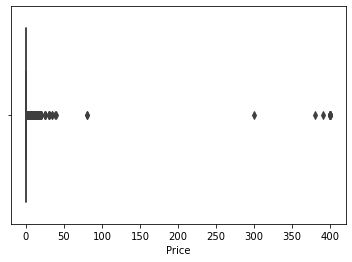

In [28]:
import seaborn as sns
sns.boxplot(x='Price', data=df)

6.1.1 Are there any outliers? Think about the price of usual apps on Play Store.

ans - on the x axis there are few outlier after 250 for price segement.

6.2 Boxplot for Reviews

<AxesSubplot:xlabel='Reviews'>

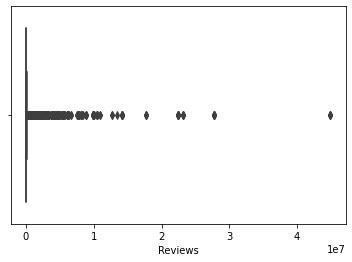

In [30]:
sns.boxplot(x='Reviews', data=df)

6.2.1 Are there any apps with very high number of reviews? Do the values seem right?

ans - there is only one app which has been reviewed for 4 times

6.3 Histogram for Ratings

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1632.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

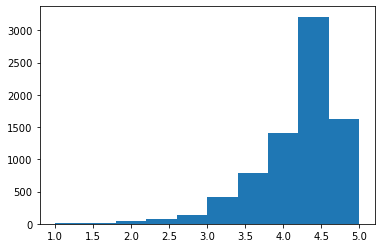

In [31]:
plt.hist(df.Rating)

6.3.1 How are the ratings distributed? Is it more toward higher ratings?

ans - the ratings are distributed toward high rating bitween the range of 4.0 to 5.0

6.4 Histogram for Size

(array([3245., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

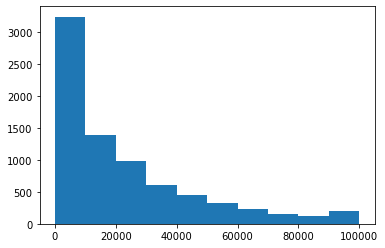

In [32]:
plt.hist(df.Size)

6.4.1 Note down your observations for the plots made above. Which of these seem to have outliers?

ans - there is one outlier bitween 0 to 20000 rang on x axis which contain value of 3245

# 7 Outlier treatment 

7.1 Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the play store is very high and suspicious.

Check out the records with very high price Is 200 indeed a high price? Drop these as most seem to be junk apps

In [33]:
df.drop(df[df.Price>200].index,axis=0,inplace=True)
df.shape

(7702, 13)

7.2 Reviews: Very few apps have very high number of reviews. These are all star apps that
don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [27]:
df.drop(df[df.Reviews>2000000].index,axis=0,inplace=True)
df.shape

(7483, 13)

7.3 Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [34]:
df.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.90, 0.99])

0.10         1000.0
0.25        10000.0
0.50       100000.0
0.70      1000000.0
0.90     10000000.0
0.90     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

taking 10000000 as cutoff only 5% cross the range

In [29]:
df = df[df.Installs<10000000]
df.shape

(6489, 13)

# 8  Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

8.1 make scatter plot of rating and price

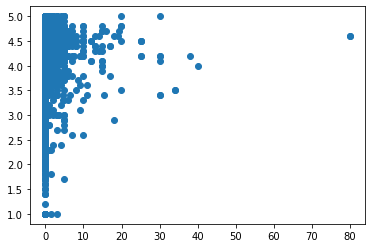

In [35]:
plt.scatter(x=df.Price,y=df.Rating)

8.1.1 What pattern do you observe? Does rating increase with price?

ans - rating does not increase with price 

8.2 scatter plot of rating and size 

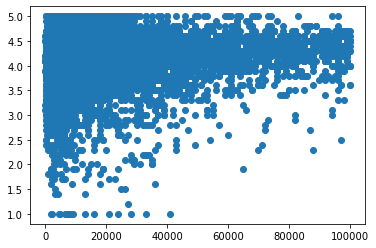

In [36]:
plt.scatter(x=df.Size,y=df.Rating)

8.2.1 Are heavier apps rated better?

ans - it is observed that havier apps are having havier rating

8.3 Make scatter plot of rating vs reviews

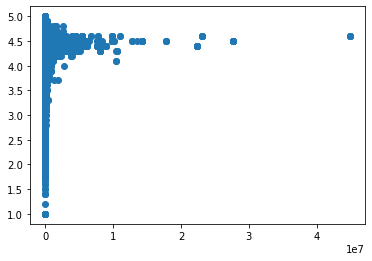

In [37]:
plt.scatter(x=df.Reviews,y=df.Rating)

8.3.1 Does more review mean a better rating always?

Scatter plot indicates higher rating for apps having Max reviews. But this cannot be always it could be an outlier

8.4 make a boxplot for rating vs content rating

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

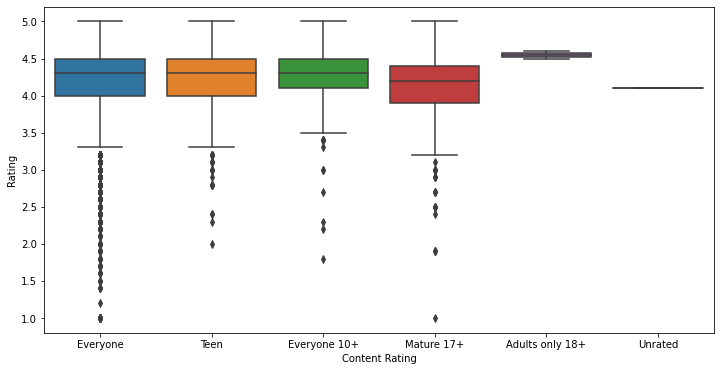

In [38]:
plt.figure(figsize=[12,6])
sns.boxplot(y="Rating", x="Content Rating", data=df)

8.4.1 Is there any difference in the ratings? Are some types liked better?

ans - Not much conclusion could be drawn as the plot is almost same for Content Ratings, except Adults only 18+ & Unrated

8.5 make a boxplot for rating vs category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

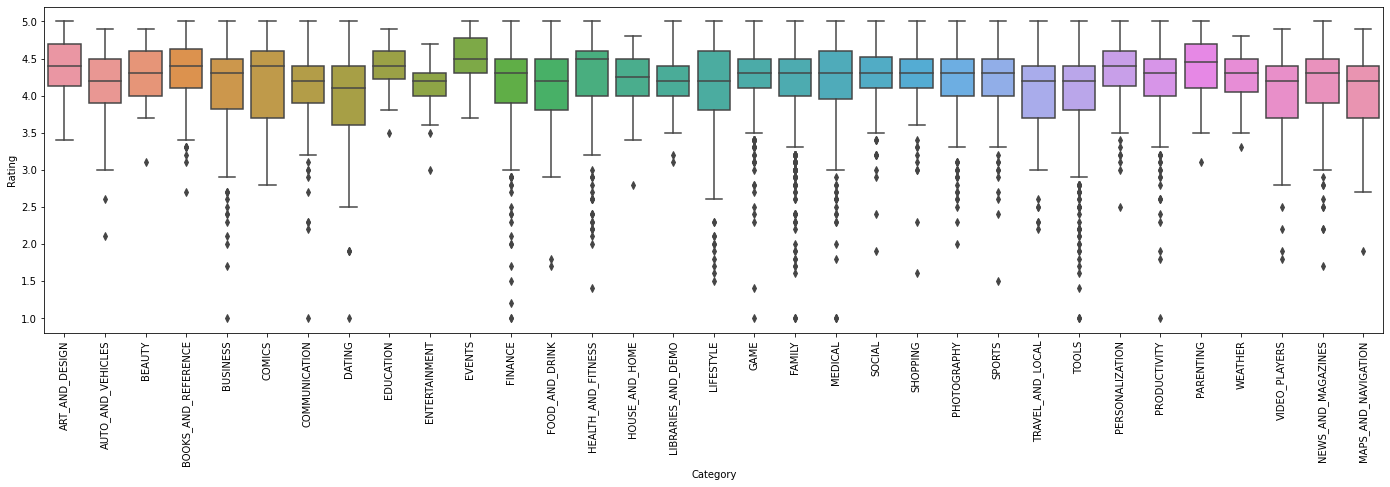

In [40]:
plt.figure(figsize=[24,6])
sns.boxplot(y="Rating", x="Category", data=df)
plt.xticks(rotation=90)

8.5.1 which genre has best rating?

ans - ART_AND_DESIGN and EVENTS

# 9 Data preprocessing

In [41]:
inpl=df
inpl.reset_index(drop=True, inplace=True)
inpl.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


9.1 Reviews and Install have some values that are still relatively very high. Before building
a linear regression model, you need to reduce the skew. Apply log transformation
(np.log1p) to Reviews and Installs.

In [42]:
inpl.Reviews=np.log1p(inpl.Reviews)
inpl.Installs=np.log1p(inpl.Installs)
inpl.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


9.2 drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not
useful for our task.

In [43]:
inpl.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'],axis=1, inplace=True)
inpl.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity


9.3 Get dummy columns for Category, Genres, and Content Rating. This needs to be done
as the models do not understand categorical data, and all data should be numeric. Dummy
encoding is one way to convert character fields to numeric. Name of dataframe should be
inp2

In [44]:
inpl=pd.get_dummies(inpl,columns=["Category", "Genres", "Content Rating", "Type"],drop_first=True)
inp2=inpl.copy()
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated', 'Type_Paid'],
      dtype='object', length=154)

In [45]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated', 'Type_Paid'],
      dtype='object', length=154)

# 10. Train test split and apply 70-30 split. Name the new dataframes df_train and df_test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
df_train, df_test=train_test_split(inp2, test_size=0.3, random_state=100)

# 11. Separate the dataframes into X_train, y_train, X_test, and y_test

In [48]:
y_train=df_train.pop('Rating')
x_train=df_train

In [49]:
y_test=df_test.pop('Rating')
x_test=df_test

# 12. Model building

In [50]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [51]:
from sklearn.metrics import r2_score

In [52]:
y_train_predict=lm.predict(x_train)
r2_score(y_train,y_train_predict)

0.1572933023439832

# 13. Make predictions on test set and report R2.

In [53]:
x_test_predict=lm.predict(x_test)
r2_score(y_test, x_test_predict)

0.14627730624521773